In [1]:
import logging
import numpy as np
import pandas as pd
from arch import arch_model
from random import gauss
from random import seed
from matplotlib import pyplot as plt
import scipy.stats as sts

In [2]:
from rules_related import combine_rules_outputs
from whole_algorithm import train_model
from auxiliary import calc_log_returns
from multivariate_normal_distribution import LongMultivariateNormal

# Testing GARCH

## #1 increasing dispersion, increments are normal

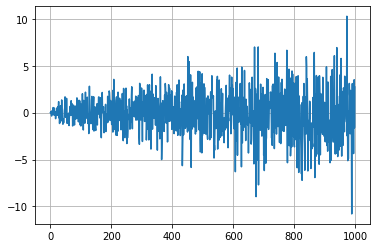

In [3]:
# create dataset
variance = np.arange(0, 10, .01)
# data = [gauss(0, var) for var in variance]
data = [sts.norm(0, var ** .5).rvs(1) for var in variance]

# plot
plt.plot(data)

plt.grid()
plt.show()

In [4]:
n_test = 100

train, test = data[:-n_test], data[-n_test:]

In [5]:
p = 1
q = 1

In [6]:
model = arch_model(train, mean='Zero', vol='GARCH', p=p, q=q, dist='normal')

In [7]:
fitted = model.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 11122.271146401137
Iteration:      2,   Func. Count:     10,   Neg. LLF: 11122.316889084086
Iteration:      3,   Func. Count:     15,   Neg. LLF: 11122.316889084086
Iteration:      4,   Func. Count:     20,   Neg. LLF: 11122.316889084086
Iteration:      5,   Func. Count:     25,   Neg. LLF: 1162262.4464627332
Iteration:      6,   Func. Count:     31,   Neg. LLF: 1845.764272022091
Iteration:      7,   Func. Count:     35,   Neg. LLF: 2220.0356942603335
Iteration:      8,   Func. Count:     40,   Neg. LLF: 1842.124629861237
Iteration:      9,   Func. Count:     45,   Neg. LLF: 1833.9620227652983
Iteration:     10,   Func. Count:     50,   Neg. LLF: 1831.5163661769127
Iteration:     11,   Func. Count:     54,   Neg. LLF: 1834.4276394890376
Iteration:     12,   Func. Count:     59,   Neg. LLF: 1830.268340971125
Iteration:     13,   Func. Count:     63,   Neg. LLF: 1830.2003158383484
Iteration:     14,   Func. Count:     77,   Neg. LLF: 

In [8]:
fitted.summary

<bound method ARCHModelResult.summary of                        Zero Mean - GARCH Model Results                        
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:               -1830.30
Distribution:                  Normal   AIC:                           3666.60
Method:            Maximum Likelihood   BIC:                           3681.01
                                        No. Observations:                  900
Date:                Sun, Oct 17 2021   Df Residuals:                      900
Time:                        19:33:52   Df Model:                            0
                               Volatility Model                              
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      9.4

In [9]:
fitted.params

omega       0.009402
alpha[1]    0.000000
beta[1]     1.000000
Name: params, dtype: float64

In [10]:
forecast = fitted.forecast(reindex=False, horizon=n_test)

In [11]:
forecast.residual_variance.values[0]

array([8.65772483, 8.66712659, 8.67652835, 8.68593011, 8.69533187,
       8.70473363, 8.71413538, 8.72353714, 8.7329389 , 8.74234066,
       8.75174242, 8.76114418, 8.77054593, 8.77994769, 8.78934945,
       8.79875121, 8.80815297, 8.81755473, 8.82695648, 8.83635824,
       8.84576   , 8.85516176, 8.86456352, 8.87396528, 8.88336703,
       8.89276879, 8.90217055, 8.91157231, 8.92097407, 8.93037583,
       8.93977758, 8.94917934, 8.9585811 , 8.96798286, 8.97738462,
       8.98678638, 8.99618814, 9.00558989, 9.01499165, 9.02439341,
       9.03379517, 9.04319693, 9.05259869, 9.06200044, 9.0714022 ,
       9.08080396, 9.09020572, 9.09960748, 9.10900924, 9.11841099,
       9.12781275, 9.13721451, 9.14661627, 9.15601803, 9.16541979,
       9.17482154, 9.1842233 , 9.19362506, 9.20302682, 9.21242858,
       9.22183034, 9.23123209, 9.24063385, 9.25003561, 9.25943737,
       9.26883913, 9.27824089, 9.28764265, 9.2970444 , 9.30644616,
       9.31584792, 9.32524968, 9.33465144, 9.3440532 , 9.35345

In [12]:
forecast.variance.values[0]

array([8.65772483, 8.66712659, 8.67652835, 8.68593011, 8.69533187,
       8.70473363, 8.71413538, 8.72353714, 8.7329389 , 8.74234066,
       8.75174242, 8.76114418, 8.77054593, 8.77994769, 8.78934945,
       8.79875121, 8.80815297, 8.81755473, 8.82695648, 8.83635824,
       8.84576   , 8.85516176, 8.86456352, 8.87396528, 8.88336703,
       8.89276879, 8.90217055, 8.91157231, 8.92097407, 8.93037583,
       8.93977758, 8.94917934, 8.9585811 , 8.96798286, 8.97738462,
       8.98678638, 8.99618814, 9.00558989, 9.01499165, 9.02439341,
       9.03379517, 9.04319693, 9.05259869, 9.06200044, 9.0714022 ,
       9.08080396, 9.09020572, 9.09960748, 9.10900924, 9.11841099,
       9.12781275, 9.13721451, 9.14661627, 9.15601803, 9.16541979,
       9.17482154, 9.1842233 , 9.19362506, 9.20302682, 9.21242858,
       9.22183034, 9.23123209, 9.24063385, 9.25003561, 9.25943737,
       9.26883913, 9.27824089, 9.28764265, 9.2970444 , 9.30644616,
       9.31584792, 9.32524968, 9.33465144, 9.3440532 , 9.35345

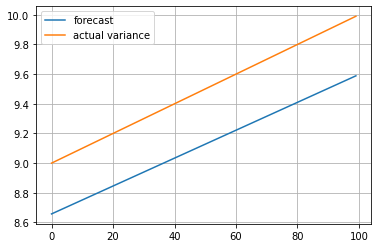

In [13]:
plt.plot(_, label='forecast')
plt.plot(variance[-n_test:], label='actual variance')

plt.legend()
plt.grid()
plt.show()

In [14]:
help(fitted.forecast)

Help on method forecast in module arch.univariate.base:

forecast(params: 'Optional[ArrayLike1D]' = None, horizon: 'int' = 1, start: 'Union[int, DateLike]' = None, align: "Literal['origin', 'target']" = 'origin', method: 'ForecastingMethod' = 'analytic', simulations: 'int' = 1000, rng: 'Optional[Callable[[Union[int, Tuple[int, ...]]], Float64Array]]' = None, random_state: 'Optional[np.random.RandomState]' = None, *, reindex: 'Optional[bool]' = None, x: 'Union[None, Dict[Label, ArrayLike], ArrayLike]' = None) -> 'ARCHModelForecast' method of arch.univariate.base.ARCHModelResult instance
    Construct forecasts from estimated model
    
    Parameters
    ----------
    params : ndarray, optional
        Alternative parameters to use.  If not provided, the parameters
        estimated when fitting the model are used.  Must be identical in
        shape to the parameters computed by fitting the model.
    horizon : int, optional
       Number of steps to forecast
    start : {int, datetim

## #2 white noise (Wiener process) 

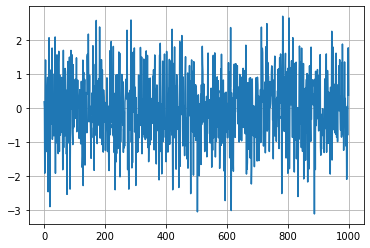

In [15]:
# create dataset
sample_size = 1000
mean = 0
variance = 1
# data = [sts.norm(0, var ** .5).rvs(1) for var in variance]
data = sts.norm(mean, variance ** .5).rvs(sample_size)

# plot
plt.plot(data)

plt.grid()
plt.show()

In [16]:
n_test = int(sample_size / 10)

train, test = data[:-n_test], data[-n_test:]

In [17]:
p = 1
q = 1

In [18]:
model = arch_model(train, mean='Zero', vol='GARCH', p=p, q=q, dist='normal')

In [19]:
fitted = model.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 4049.598349385039
Iteration:      2,   Func. Count:     13,   Neg. LLF: 1275.7574822799052
Iteration:      3,   Func. Count:     17,   Neg. LLF: 1275.7574316181242
Iteration:      4,   Func. Count:     21,   Neg. LLF: 1275.7573347465811
Iteration:      5,   Func. Count:     25,   Neg. LLF: 1275.753531107492
Iteration:      6,   Func. Count:     29,   Neg. LLF: 1275.7166245814215
Iteration:      7,   Func. Count:     33,   Neg. LLF: 1275.7157775384685
Iteration:      8,   Func. Count:     37,   Neg. LLF: 1275.7139288177998
Iteration:      9,   Func. Count:     41,   Neg. LLF: 1275.7138840961484
Iteration:     10,   Func. Count:     44,   Neg. LLF: 1275.713884097716
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1275.7138840961484
            Iterations: 10
            Function evaluations: 44
            Gradient evaluations: 10


In [20]:
fitted.summary

<bound method ARCHModelResult.summary of                        Zero Mean - GARCH Model Results                        
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:               -1275.71
Distribution:                  Normal   AIC:                           2557.43
Method:            Maximum Likelihood   BIC:                           2571.83
                                        No. Observations:                  900
Date:                Sun, Oct 17 2021   Df Residuals:                      900
Time:                        19:33:53   Df Model:                            0
                               Volatility Model                              
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega         

In [21]:
fitted.params

omega       9.970444e-01
alpha[1]    0.000000e+00
beta[1]     1.068801e-14
Name: params, dtype: float64

In [22]:
forecast = fitted.forecast(reindex=False, horizon=n_test)

In [23]:
forecast_variance = forecast.variance.values[0]

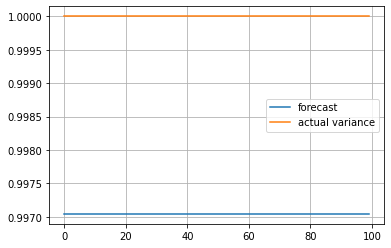

In [24]:
plt.plot(forecast_variance, label='forecast')
plt.plot([variance] * n_test, label='actual variance')

plt.legend()
plt.grid()
plt.show()

# Reading files

In [25]:
rtsi = pd.read_csv('files/RI.RTSI_790101_211016.csv', sep=',')

In [26]:
(rtsi['<TICKER>'] != 'RI.RTSI').any()

False

In [27]:
(rtsi['<TIME>'] != '00:00:00').any()

False

In [28]:
rtsi.drop(columns=['<PER>', '<TIME>', '<TICKER>'], inplace=True)

In [29]:
rtsi['<DATE>'] = pd.to_datetime(rtsi['<DATE>'], format='%Y%m%d')

In [30]:
rtsi.set_index('<DATE>', inplace=True)

In [31]:
rtsi['return'] = rtsi['<CLOSE>'].pct_change(1)

In [32]:
rtsi['log return'] = calc_log_returns(rtsi['<CLOSE>'])  # rtsi['<CLOSE>'].rolling(2).apply(lambda values: np.log(values[1] / values[0])).copy()

In [33]:
rtsi = rtsi.iloc[1:].copy()

In [34]:
rtsi.isna().any()

<OPEN>        False
<HIGH>        False
<LOW>         False
<CLOSE>       False
<VOL>         False
return        False
log return    False
dtype: bool

In [35]:
rtsi

,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,return,log return
<DATE>,,,,,,,
2001-02-18,180.10,180.10,180.10,180.10,0,0.000000,0.000000
2001-02-19,180.10,181.21,176.67,177.29,0,-0.015602,-0.015725
2001-02-20,177.29,179.90,175.28,176.45,0,-0.004738,-0.004749
2001-02-21,176.45,176.45,161.12,162.39,0,-0.079683,-0.083037
2001-02-22,162.39,168.35,162.39,168.31,0,0.036455,0.035807
...,...,...,...,...,...,...,...
2021-10-11,1871.73,1883.71,1867.58,1882.43,1769145502,0.011537,0.011471
2021-10-12,1867.15,1876.79,1860.64,1869.94,1386130631,-0.006635,-0.006657
2021-10-13,1869.05,1869.05,1835.80,1855.11,1830447018,-0.007931,-0.007962


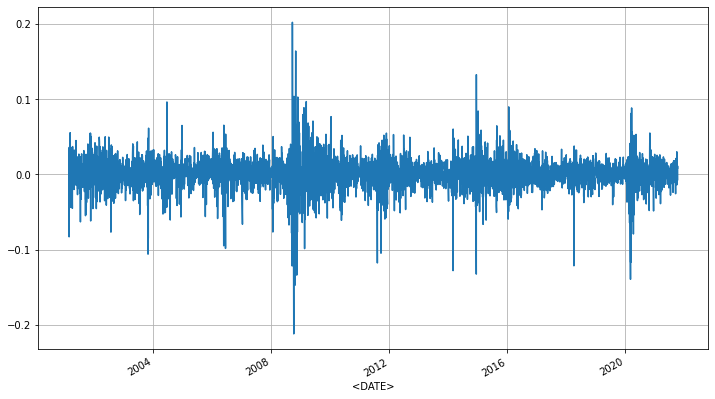

In [36]:
rtsi['log return'].plot(figsize=(12, 7))

plt.grid()
plt.show()

In [37]:
rtsi['log return'].describe()

count    5174.000000
mean        0.000455
std         0.020327
min        -0.211994
25%        -0.008822
50%         0.001318
75%         0.010414
max         0.202039
Name: log return, dtype: float64

# Testing `train`

In [38]:
logging.basicConfig(level=logging.DEBUG)

In [39]:
rescale_factor = 100

In [52]:
start_date = '2010-01-01'

In [53]:
input_data = rtsi['log return'].loc[start_date:].copy() * rescale_factor
clusterization_method = 'gaussian'
local_method = 'garch'
local_method_parameters = {'p': 1, 'q': 1, 'mean': 'Zero', 'dist': 'normal'}

In [54]:
n = input_data.shape[0]

In [55]:
mu = 0
sigma = .02 * rescale_factor

centers = np.array([[mu] * n])
cov_matrices = np.array([np.diag([sigma] * n, k=0)])

In [56]:
clusterization_parameters = {'centers': centers, 'cov_matrices': cov_matrices, 'n_clusters': 1}

In [57]:
train_model(input_data,
            clusterization_method=clusterization_method,
            clusterization_parameters=clusterization_parameters,
            local_method=local_method,
            local_method_parameters=local_method_parameters)

DEBUG:train_model:Starting clusterization
DEBUG:cluster_input:clustering method is gaussian
DEBUG:cluster_input:parameters is not None
INFO:calc_gaussian_membership_degrees:Starting
DEBUG:pdf:log_pdf = -6079.516519855979, type(log_pdf) = <class 'numpy.float64'>
DEBUG:pdf:long_log_pdf = -6079.516519855979, type(long_log_pdf) = <class 'numpy.float128'>
DEBUG:train_model:Clusterization completed
Estimated parameters: {'centers': array([[0, 0, 0, ..., 0, 0, 0]]), 'cov_matrices': array([[[2., 0., 0., ..., 0., 0., 0.],
        [0., 2., 0., ..., 0., 0., 0.],
        [0., 0., 2., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 2., 0., 0.],
        [0., 0., 0., ..., 0., 2., 0.],
        [0., 0., 0., ..., 0., 0., 2.]]]), 'n_clusters': 1}
Membership degrees:
[5.0063682e-2641]
DEBUG:train_model:Starting to run local model for each rule
DEBUG:apply_local_model:Method is GARCH
DEBUG:train_model:Local model runs for each rule are completed. rules_outputs: [[1.81711941]]
DEBUG:train_model:Sta

Iteration:      1,   Func. Count:      5,   Neg. LLF: 18208.402879687113
Iteration:      2,   Func. Count:     14,   Neg. LLF: 179841745.16303405
Iteration:      3,   Func. Count:     19,   Neg. LLF: 6259.643369009693
Iteration:      4,   Func. Count:     26,   Neg. LLF: 5746.523881004245
Iteration:      5,   Func. Count:     31,   Neg. LLF: 5518.704480234793
Iteration:      6,   Func. Count:     35,   Neg. LLF: 5518.7020679092275
Iteration:      7,   Func. Count:     39,   Neg. LLF: 5518.701967731444
Iteration:      8,   Func. Count:     43,   Neg. LLF: 5518.7019340838815
Iteration:      9,   Func. Count:     46,   Neg. LLF: 5518.701934085554
Optimization terminated successfully    (Exit mode 0)
            Current function value: 5518.7019340838815
            Iterations: 9
            Function evaluations: 46
            Gradient evaluations: 9


1.8171194100517129577

## Same data fed to GARCH(1, 1)

In [58]:
model = arch_model(input_data, mean=local_method_parameters['mean'], vol='GARCH', p=p, q=q,
                   dist=local_method_parameters['dist'])

In [59]:
fitted = model.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 18208.402879687113
Iteration:      2,   Func. Count:     14,   Neg. LLF: 179841745.16303405
Iteration:      3,   Func. Count:     19,   Neg. LLF: 6259.643369009693
Iteration:      4,   Func. Count:     26,   Neg. LLF: 5746.523881004245
Iteration:      5,   Func. Count:     31,   Neg. LLF: 5518.704480234793
Iteration:      6,   Func. Count:     35,   Neg. LLF: 5518.7020679092275
Iteration:      7,   Func. Count:     39,   Neg. LLF: 5518.701967731444
Iteration:      8,   Func. Count:     43,   Neg. LLF: 5518.7019340838815
Iteration:      9,   Func. Count:     46,   Neg. LLF: 5518.701934085554
Optimization terminated successfully    (Exit mode 0)
            Current function value: 5518.7019340838815
            Iterations: 9
            Function evaluations: 46
            Gradient evaluations: 9


In [60]:
fitted.summary

<bound method ARCHModelResult.summary of                        Zero Mean - GARCH Model Results                        
Dep. Variable:             log return   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -5518.70
Distribution:                  Normal   AIC:                           11043.4
Method:            Maximum Likelihood   BIC:                           11061.4
                                        No. Observations:                 2965
Date:                Sun, Oct 17 2021   Df Residuals:                     2965
Time:                        19:47:07   Df Model:                            0
                              Volatility Model                              
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.

In [61]:
fitted.params

omega       0.059160
alpha[1]    0.081849
beta[1]     0.900093
Name: params, dtype: float64

In [62]:
forecast = fitted.forecast(reindex=False, horizon=1)

In [63]:
forecast_variance = forecast.variance.values[0]

In [64]:
forecast_variance

array([1.81711941])